In [64]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import svm

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

# Inlezen van de dataset en overzicht

In [65]:
#Inlezen van de dataset
dataset = pd.read_csv('diabetes.csv')
dataset.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [66]:
# Beschrijvende statistische analyse
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0.5, 1.0, 'Countplot Outcome')

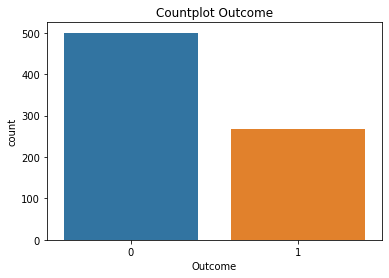

In [67]:
# Balancedness

# gebalanceerdheid controleren
sns.countplot(data=dataset, x="Outcome")
plt.title('Countplot Outcome')

# Preprocessing en opsplitsen in training en test set

In [68]:
# Opsplitsen in features en targets
features = list(dataset.columns[:8])
print(features)
X = dataset[features].values 

y= dataset['Outcome'].values




print(X.shape)
print(y.shape)







# Opsplitsen van data in een training en test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state =0)
print(X_train.shape)
print(X_test.shape)

# Normalisatie van de dataset

scaler = preprocessing.StandardScaler().fit(X_train)  # Normaliseer naar gemiddelde = 0 en standaardafwijking = 1

#scaler = preprocessing.MinMaxScaler().fit(X_train)   

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
(768, 8)
(768,)
(614, 8)
(154, 8)


In [69]:
X_train[1]

array([ 0.03644676, -0.75182191, -0.47230103,  0.14814855, -0.69965674,
       -0.50667229, -0.07049698, -0.96569189])

# Logistic regression

              precision    recall  f1-score   support

           0       0.89      0.77      0.82       107
           1       0.60      0.79      0.68        47

    accuracy                           0.77       154
   macro avg       0.74      0.78      0.75       154
weighted avg       0.80      0.77      0.78       154

77.27272727272727
[[82 25]
 [10 37]]


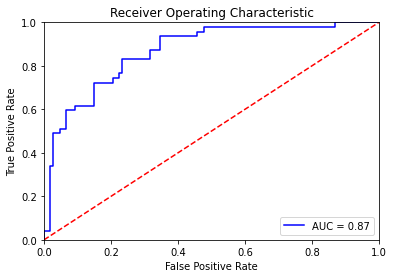

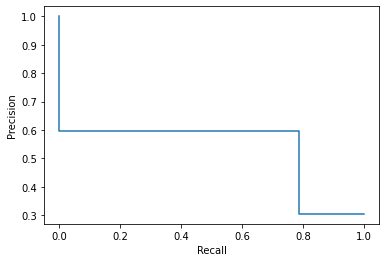

In [70]:
# logistic regression met class_weight = 'balanced' om de gebalanceerdheid te compenseren

logreg = linear_model.LogisticRegression(C=1e3, penalty = 'l2',multi_class='auto',solver = 'lbfgs',class_weight='balanced')

logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

print(classification_report(y_test,y_pred))

print(accuracy_score(y_test,y_pred)*100)

print(confusion_matrix(y_test,y_pred))


import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Precision recall curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

precision, recall, _ = precision_recall_curve(y_test, y_pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

In [71]:
#hyperparameter tuning met randomsearch

# Cross-validation via random search


model = LogisticRegression()
parameters = {'C': uniform(0.01, 1000), 'solver':['liblinear','lbfgs']}


n_iter_search = 300

random_search = RandomizedSearchCV(model, param_distributions=parameters,cv=5,n_iter=n_iter_search,n_jobs = -1,verbose=1)

random_search = random_search.fit(X_train, y_train)

best_accuracy = random_search.best_score_ 
best_parameters = random_search.best_params_  

print('Best accuracy : ', random_search.best_score_)
print('Best parameters :',random_search.best_params_  )

y_pred = random_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Best accuracy :  0.7574037051845928
Best parameters : {'C': 10.73524948704956, 'solver': 'lbfgs'}
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154

[[98  9]
 [18 29]]
82.46753246753246


In [72]:
## Predictie op een nieuwe patiënt

# Pregnancies:0 -
# Glucose: 200 -
# BloodPressure: 80 - 
# SkinThickness:20 - 
# Insulin:35 - 
# BMI:35 - 
# DiabetesPedigreeFunction:128 - 
# Age: 30



patient = np.array([0,200,80,20,35,35,128,30])

# scaling
patient = scaler.transform(patient.reshape(1, -1))

print(patient)
y_patient = logreg.predict(patient.reshape(1,-1))
y_patient_prob = logreg.predict_proba(patient.reshape(1,-1))
print(y_patient)
print(y_patient_prob)

if y_patient == 0:
    print('Patiënt has diabetes')
else:
    print('Patiënt does not have diabetes')

[[-1.12606292e+00  2.48882158e+00  5.51504208e-01 -3.88902646e-02
  -4.01520171e-01  3.53235089e-01  3.83062062e+02 -2.99379408e-01]]
[1]
[[0. 1.]]
Patiënt heeft diabetes
